In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import pandas as pd
import random
from keras.models import load_model

In [ ]:
pip install opencv-python-headless

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Mar 11 01:28:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Keras guide:

https://keras.io/guides/transfer_learning/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_dir = '/content/drive/My Drive/Colab Notebooks/Mestrado final/RXT teste mix_data/'

In [ ]:
tf.io.gfile.listdir(test_dir)

['normais', 'covid', 'tuberculose', 'dip']

In [ ]:
image_shape = (224,224,3)
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator()

In [ ]:
image_gen.flow_from_directory(test_dir)

Found 298 images belonging to 4 classes.


In [ ]:
from sklearn.utils import shuffle
test_image_gen = image_gen.flow_from_directory(test_dir,
                                                     #target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=False
                                               )

Found 298 images belonging to 4 classes.


In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

**Loading the model**

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Mestrado final/Novos treinamentos/KFolds mix aumentado/VGG19_fine-tuning_RandAugm_avg_4_classes_mix_data_part2345.h5')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 tf.cast (TFOpLambda)        (None, None, None, 3)     0         
                                                                 
 tf.__operators__.getitem (  (None, None, None, 3)     0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, None, None, 3)     0         
 )                                                               
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928 

In [ ]:
model.evaluate(test_image_gen)

10/10 [==============================] - 108s 11s/step - loss: 0.6880 - accuracy: 0.8826


[0.688048779964447, 0.8825503587722778]

In [ ]:
pred_probabilities = model.predict(test_image_gen)

10/10 [==============================] - 2s 188ms/step


In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

In [ ]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=i

In [ ]:
def int_predict (pred_probabilities):
  predictions = np.zeros((pred_probabilities.shape[0],1),dtype=int)
  i = 0
  while i < pred_probabilities.shape[0]:
    predictions[i,:] = [np.argmax(pred_probabilities[i])]
    i = i + 1

  return predictions

In [ ]:
predictions = int_predict(pred_probabilities)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[78,  2,  3,  1],
       [ 6, 35,  1,  4],
       [ 3,  2, 76,  3],
       [ 3,  5,  2, 74]])

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        84
           1       0.80      0.76      0.78        46
           2       0.93      0.90      0.92        84
           3       0.90      0.88      0.89        84

    accuracy                           0.88       298
   macro avg       0.87      0.87      0.87       298
weighted avg       0.88      0.88      0.88       298



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
y_score = pred_probabilities
num_classes = test_image_gen.num_classes

In [ ]:
# Obtenha as etiquetas verdadeiras de todas as imagens no gerador
y_test = test_image_gen.classes
y_test = label_binarize(y_test, classes=range(num_classes))

In [ ]:
# Calcule as métricas ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

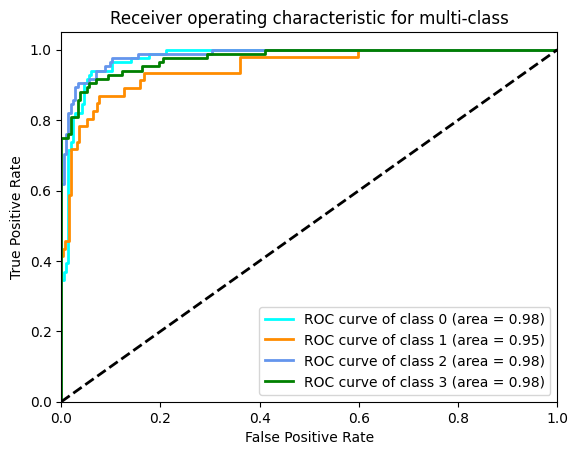

In [ ]:
# Plote a curva ROC para cada classe
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

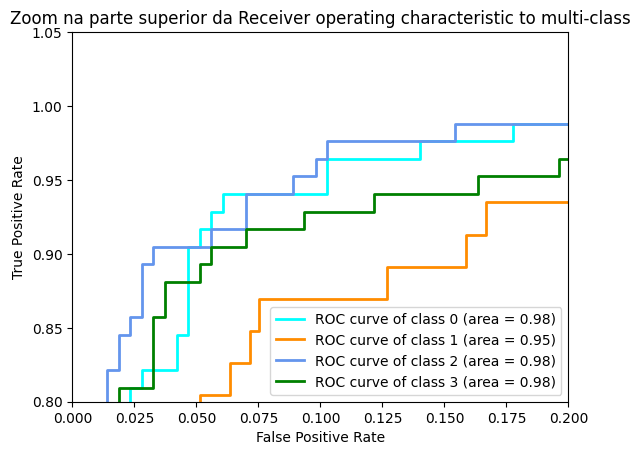

In [ ]:
# Agora, vamos dar zoom em na parte superior esquerda do gráfico.
plt.figure()
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 0.2])  # Ajusta o limite do eixo X para focar no início do gráfico
plt.ylim([0.8, 1.05])  # Ajusta o limite do eixo Y para focar na parte superior do gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zoom na parte superior da Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#from google.colab import runtime
#runtime.unassign()

In [ ]:
# nome da última camada de convolução
last_conv_layer_name = 'block5_conv4'

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # Prepare o modelo para extrair os dados necessários
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    # Cria um modelo que mapeia as ativações da última camada convolucional para a saída final
    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer in model.layers[model.layers.index(last_conv_layer)+1:]:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    with tf.GradientTape() as tape:
        # Forward pass
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # Calcula os gradientes
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # Processamento adicional para evitar problemas de dimensionamento
    if grads is None:
        raise ValueError("Nenhum gradiente foi retornado pelo GradientTape.")

    if len(grads.shape) != 4:
        grads = tf.reshape(grads, [-1, 1, 1, grads.shape[-1]])

    # Ponderação por média do gradiente
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiplica cada canal no mapa de características
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


In [ ]:
def superimpose_heatmap(heatmap, original_image, alpha=0.4):
    # Inverter os valores do heatmap
    heatmap = np.max(heatmap) - heatmap

    # Normalizar o heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))

    # Aplicar o colormap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superpor o heatmap na imagem original
    superimposed_img = heatmap * alpha + original_image
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    return superimposed_img


In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input
import cv2

In [ ]:
# Converta as previsões para um formato adequado se necessário
# Se 'predictions' for um array bidimensional de forma (n_samples, 1), converta-o para um array unidimensional
predictions_flat = predictions.flatten()

# Compare as previsões com as classes reais
incorrect_predictions = np.where(predictions_flat != test_image_gen.classes)[0]

# 'incorrect_predictions' agora contém os índices das imagens que foram classificadas incorretamente
print("Índices das previsões incorretas:", incorrect_predictions)

Índices das previsões incorretas: [ 46  53  54  75  78  80  90  92  98 106 109 113 115 119 120 124 126 132
 149 153 167 168 169 176 189 219 220 221 222 223 224 225 227 229 231]


In [ ]:
# Se quiser ver as classes reais e as previsões para esses casos:
for idx in incorrect_predictions:
    print(f"Índice: {idx}, Classe Real: {test_image_gen.classes[idx]}, Previsão: {predictions_flat[idx]}")

Índice: 46, Classe Real: 0, Previsão: 2
Índice: 53, Classe Real: 0, Previsão: 1
Índice: 54, Classe Real: 0, Previsão: 2
Índice: 75, Classe Real: 0, Previsão: 2
Índice: 78, Classe Real: 0, Previsão: 1
Índice: 80, Classe Real: 0, Previsão: 3
Índice: 90, Classe Real: 1, Previsão: 3
Índice: 92, Classe Real: 1, Previsão: 3
Índice: 98, Classe Real: 1, Previsão: 3
Índice: 106, Classe Real: 1, Previsão: 0
Índice: 109, Classe Real: 1, Previsão: 2
Índice: 113, Classe Real: 1, Previsão: 3
Índice: 115, Classe Real: 1, Previsão: 0
Índice: 119, Classe Real: 1, Previsão: 0
Índice: 120, Classe Real: 1, Previsão: 0
Índice: 124, Classe Real: 1, Previsão: 0
Índice: 126, Classe Real: 1, Previsão: 0
Índice: 132, Classe Real: 2, Previsão: 1
Índice: 149, Classe Real: 2, Previsão: 3
Índice: 153, Classe Real: 2, Previsão: 1
Índice: 167, Classe Real: 2, Previsão: 0
Índice: 168, Classe Real: 2, Previsão: 3
Índice: 169, Classe Real: 2, Previsão: 0
Índice: 176, Classe Real: 2, Previsão: 0
Índice: 189, Classe Real:

In [ ]:
# Mapeia cada classe ao seu índice inicial
offsets = {0: 0, 1: 83, 2: 129, 3: 213}

# Exibir resultados ajustados
for idx in incorrect_predictions:
    real_class = test_image_gen.classes[idx]
    indice_ajustado = idx - offsets[real_class]
    print(f"Classe {real_class}: Índice na Classe: {indice_ajustado}, Índice Geral: {idx}, Previsão: {predictions_flat[idx]}")




Classe 0: Índice na Classe: 46, Índice Geral: 46, Previsão: 2
Classe 0: Índice na Classe: 53, Índice Geral: 53, Previsão: 1
Classe 0: Índice na Classe: 54, Índice Geral: 54, Previsão: 2
Classe 0: Índice na Classe: 75, Índice Geral: 75, Previsão: 2
Classe 0: Índice na Classe: 78, Índice Geral: 78, Previsão: 1
Classe 0: Índice na Classe: 80, Índice Geral: 80, Previsão: 3
Classe 1: Índice na Classe: 7, Índice Geral: 90, Previsão: 3
Classe 1: Índice na Classe: 9, Índice Geral: 92, Previsão: 3
Classe 1: Índice na Classe: 15, Índice Geral: 98, Previsão: 3
Classe 1: Índice na Classe: 23, Índice Geral: 106, Previsão: 0
Classe 1: Índice na Classe: 26, Índice Geral: 109, Previsão: 2
Classe 1: Índice na Classe: 30, Índice Geral: 113, Previsão: 3
Classe 1: Índice na Classe: 32, Índice Geral: 115, Previsão: 0
Classe 1: Índice na Classe: 36, Índice Geral: 119, Previsão: 0
Classe 1: Índice na Classe: 37, Índice Geral: 120, Previsão: 0
Classe 1: Índice na Classe: 41, Índice Geral: 124, Previsão: 0
Cla

In [ ]:
image_name = tf.io.gfile.listdir(test_dir+'covid')[1]
covid19 = test_dir+'covid/'+image_name
covid19_img_array = cv2.imread(covid19)

In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

In [ ]:
# Gera o heatmap
heatmap = make_gradcam_heatmap(np.expand_dims(covid19_img_array, axis=0), model, last_conv_layer_name)


In [ ]:
# Sobrepõe o heatmap na imagem original
img_with_heatmap = superimpose_heatmap(heatmap, covid19_img_array)

Comparison of a chest X-ray from the test group with COVID-19 (first) with the Grad-CAM Heatmap (second). The model accurately highlighted the area of interest and correctly made the classification.

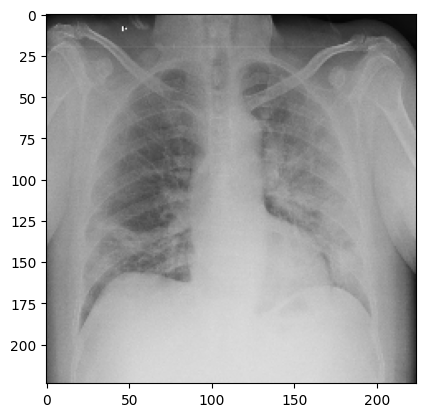

In [ ]:
plt.imshow(covid19_img_array)

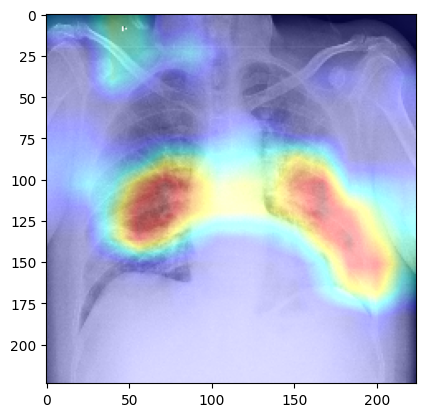

In [ ]:
# Mostra a imagem com o heatmap
plt.imshow(img_with_heatmap)
plt.show()

In [ ]:
image_name = tf.io.gfile.listdir(test_dir+'dip')[4]
covid19 = test_dir+'dip/'+image_name
covid19_img_array = cv2.imread(covid19)

In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

In [ ]:
# Gera o heatmap
heatmap = make_gradcam_heatmap(np.expand_dims(covid19_img_array, axis=0), model, last_conv_layer_name)


In [ ]:
# Sobrepõe o heatmap na imagem original
img_with_heatmap = superimpose_heatmap(heatmap, covid19_img_array)

Comparison of a chest X-ray from the test group with fibrosing ILD (first) with the Grad-CAM Heatmap (second). The model placed greater importance on the correct area of interest and accurately made the classification, despite also focusing on incorrect areas.

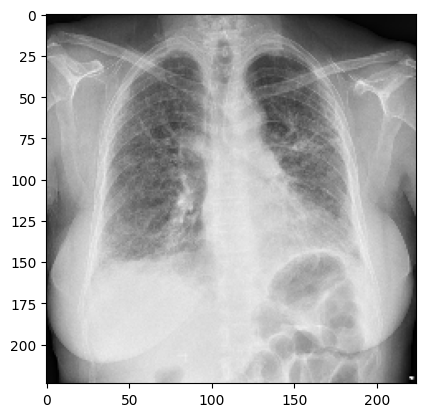

In [ ]:
plt.imshow(covid19_img_array)

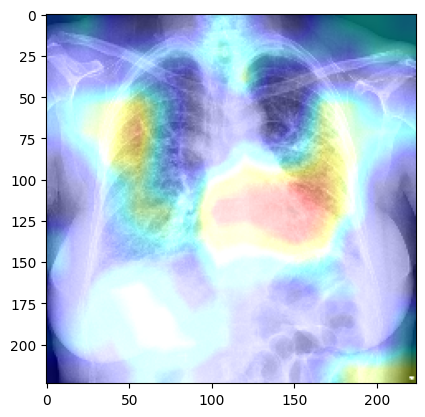

In [ ]:
# Mostra a imagem com o heatmap
plt.imshow(img_with_heatmap)
plt.show()

In [ ]:
image_name = tf.io.gfile.listdir(test_dir+'dip')[6]
covid19 = test_dir+'dip/'+image_name
covid19_img_array = cv2.imread(covid19)

In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

In [ ]:
# Gera o heatmap
heatmap = make_gradcam_heatmap(np.expand_dims(covid19_img_array, axis=0), model, last_conv_layer_name)


In [ ]:
# Sobrepõe o heatmap na imagem original
img_with_heatmap = superimpose_heatmap(heatmap, covid19_img_array)

Comparison of a chest X-ray from the test group with granulomatous ILD (first) with the Grad-CAM Heatmap (second). The model accurately highlighted the area of interest and correctly made the classification.

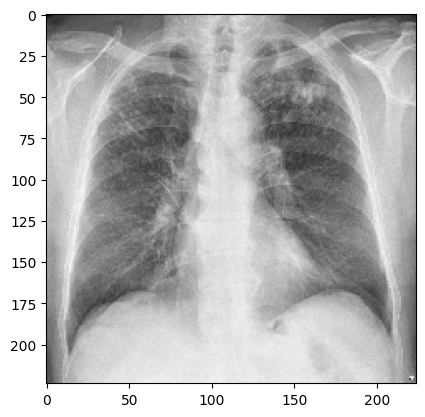

In [ ]:
plt.imshow(covid19_img_array)

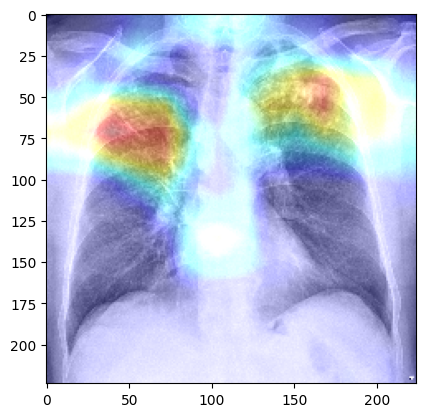

In [ ]:
# Mostra a imagem com o heatmap
plt.imshow(img_with_heatmap)
plt.show()

In [ ]:
image_name = tf.io.gfile.listdir(test_dir+'tuberculose')[23]
covid19 = test_dir+'tuberculose/'+image_name
covid19_img_array = cv2.imread(covid19)

In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

In [ ]:
# Gera o heatmap
heatmap = make_gradcam_heatmap(np.expand_dims(covid19_img_array, axis=0), model, last_conv_layer_name)


In [ ]:
# Sobrepõe o heatmap na imagem original
img_with_heatmap = superimpose_heatmap(heatmap, covid19_img_array)

Comparison of a chest X-ray from the test group with tuberculosis (first) with the Grad-CAM Heatmap (second). The model accurately highlighted the correct area of interest and successfully made the classification.

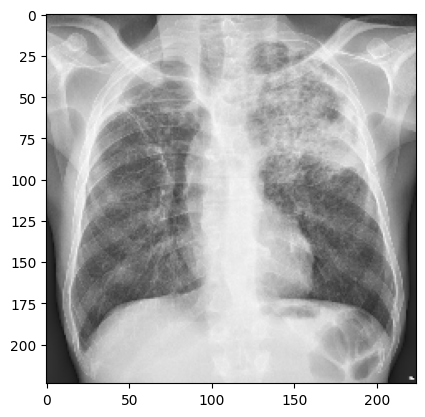

In [ ]:
plt.imshow(covid19_img_array)

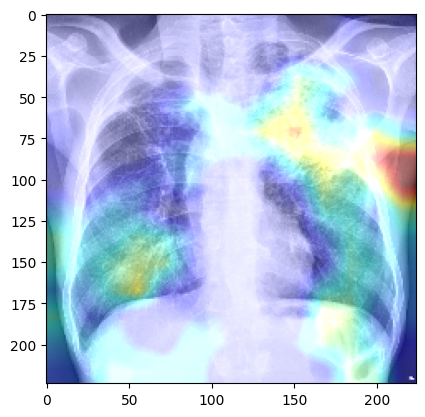

In [ ]:
# Mostra a imagem com o heatmap
plt.imshow(img_with_heatmap)
plt.show()

In [ ]:
image_name = tf.io.gfile.listdir(test_dir+'covid')[80]
covid19 = test_dir+'covid/'+image_name
covid19_img_array = cv2.imread(covid19)

In [ ]:
test_image_gen.class_indices

{'covid': 0, 'dip': 1, 'normais': 2, 'tuberculose': 3}

In [ ]:
# Gera o heatmap
heatmap = make_gradcam_heatmap(np.expand_dims(covid19_img_array, axis=0), model, last_conv_layer_name)


In [ ]:
# Sobrepõe o heatmap na imagem original
img_with_heatmap = superimpose_heatmap(heatmap, covid19_img_array)

Chest X-ray from the test group with COVID-19 (first) alongside the Grad-CAM Heatmap (second). The model misclassified it as 'tuberculosis'.

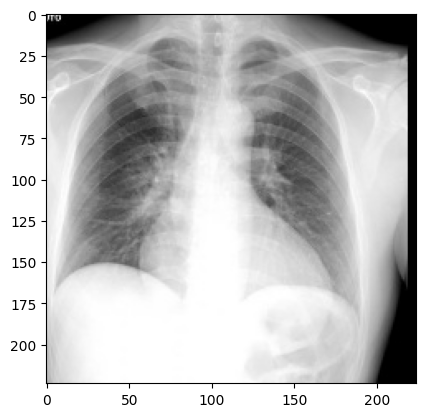

In [ ]:
plt.imshow(covid19_img_array)

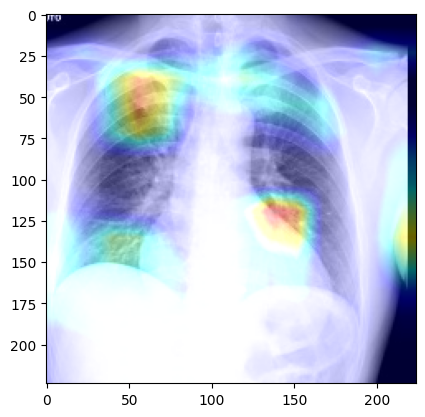

In [ ]:
# Mostra a imagem com o heatmap
plt.imshow(img_with_heatmap)
plt.show()